# Import Libraries


In [1]:
import pandas as pd
import numpy as np
import nltk
import tensorflow as tf
from keras.layers import *
from tensorflow import *
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import *
from nltk.stem import  WordNetLemmatizer
from nltk.corpus import stopwords
import re
import os
from nltk.tokenize import word_tokenize, sent_tokenize
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import  TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import LabelEncoder
import warnings
import random
import emoji
from wordcloud import WordCloud
import plotly.express as px
from nltk import pos_tag
from plotly import graph_objects as go
from collections import Counter
import string
pd.options.display.max_rows = 100
pd.options.display.max_columns =None 
random.seed(10)

In [2]:
colors1 = ['#ecf5e6','#8ec86d']
colors2 = ['#c6e9bb', '#b3e2a4']
color3 = ['Salmon', 'FireBrick', 'MediumVioletRed', 'Tomato', 'Orange', 'Gold', 'DarkKhaki', 'Lavender', 'Plum', 'LimeGreen', 'MediumSpringGreen', 'Green', 'DeepSkyBlue', 'Aquamarine', 'MediumSlateBlue']

# Download Some Packages

In [3]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/osamaanmar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/osamaanmar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/osamaanmar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/osamaanmar/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

# Ignore Warnings

In [4]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
warnings.filterwarnings(action='ignore')

# Read Data

In [5]:
Corpus = pd.read_csv('MovieReviewTrainingDatabase.csv')
Corpus.rename(columns={'review': 'Review', 'sentiment': 'Sentiment'}, inplace=True)
Corpus


,Sentiment,Review
0,Positive,With all this stuff going down at the moment w...
1,Positive,'The Classic War of the Worlds' by Timothy Hin...
2,Negative,The film starts with a manager (Nicholas Bell)...
3,Negative,It must be assumed that those who praised this...
4,Positive,Superbly trashy and wondrously unpretentious 8...
...,...,...
24995,Negative,It seems like more consideration has gone into...
24996,Negative,I don't believe they made this film. Completel...
24997,Negative,"Guy is a loser. Can't get girls, needs to buil..."
24998,Negative,This 30 minute documentary Buñuel made in the ...


# Percantage Of Each Sentiment

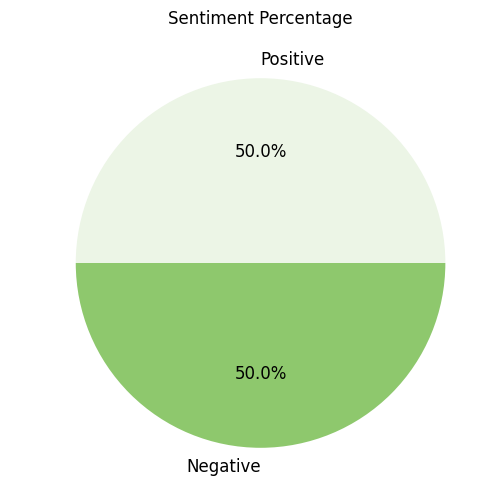

In [6]:
Corpus['Sentiment'].value_counts().plot.pie(autopct = '%0.1f%%',
                                                    textprops = {'size': 'large'},
                                                    title = 'Sentiment Percentage',
                                                    figsize = (6,6),
                                                    colors = colors1,
                                                    ylabel = ' ');

# Count Of Each Sentiment

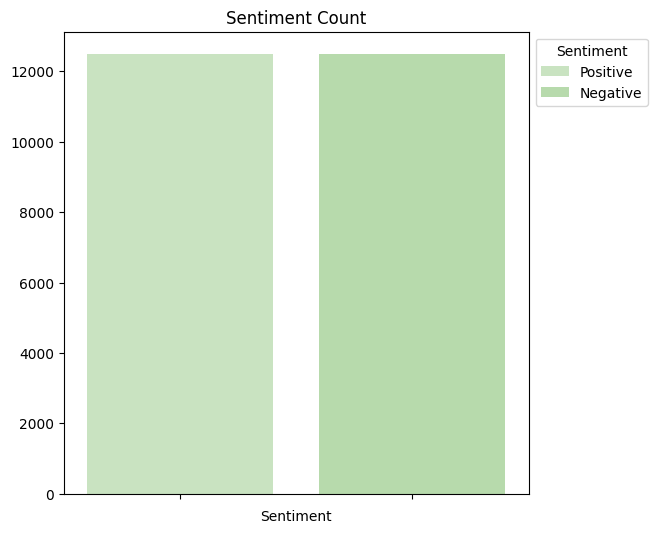

In [7]:
ax, fig = plt.subplots(figsize = (6,6))
ax =sns.countplot(x='Sentiment', data=Corpus, dodge=False, hue='Sentiment',  order= Corpus['Sentiment'].value_counts().index, hue_order =Corpus['Sentiment'].value_counts().index,  palette=colors2);
ax.set(xticklabels=[]) 
ax.set(ylabel=None) 
plt.title('Sentiment Count')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

# Number Of Sentences

In [8]:
Corpus['NumberOfSentences'] = Corpus['Review'].apply(lambda n:len(sent_tokenize(n)))
Corpus.drop(Corpus[ Corpus["NumberOfSentences"] == 0].index, inplace = True)


In [9]:
Corpus['NumberOfSentences'].sum()

311468

# Average Number Of Sentences

In [10]:
AverageNumberOfSentence = int(np.round(Corpus["NumberOfSentences"].mean()))
AverageNumberOfSentence

12

# Maximum Number Of Sentences

In [11]:
MaximumNumberOfSentence = Corpus["NumberOfSentences"].max()
MaximumNumberOfSentence

282

# Minimum Number Of Sentences

In [12]:
MinimumNumberOfSentence = Corpus["NumberOfSentences"].min()
MinimumNumberOfSentence

1

# Text Normalization

In [13]:
def remove_emojis(text):
     "Remove All Emojis From Text"
     text = emoji.replace_emoji(text, replace="")
     return text

def remove_duplicate_char(text):
     "Remove Chars Word Has More Than 2 Same Following Char"
     text = re.sub(r'(.)\1+', r'\1\1', text)
     return text

def remove_single_char(text):
     "Remove Alone Chars From Text"
     text = ' '.join( [w for w in text.split() if len(w)>1] )
     return text

def remove_special_character_(text):
     "Remove Special Character From Text"
     Punctuations = '`؛،؟.,«»÷-' + string.punctuation
     for punctuation in Punctuations:
        text = text.replace(punctuation, ' ')
     return text   

def remove_new_line_char(text):
     "Remove New Line Symbols From Text"
     text = text.replace('\n', ' ')
     return text  
 
def remove_number(text):
     "Remove All Number From Text"
     text = re.sub(r'[0-9٠-٩]', '', text)
     return text

def remove_html_tags(text):
    "Remove All HTL Tags From Text"
    text = re.sub("<.*?>", ' ', text)
    return text

def remove_non_english(text):
    "Remove Non English Word And Char"
    char = set(string.printable)
    for c in text:
        if c not in char:
            text = text.replace(c, ' ')
    return text

def remove_whitespace(text):
     "Remove Extra WhiteSpace"
     text = text.strip()
     return text 

def remove_unicode_characters_(text):
     "Remove Unicode Char"
     for character in text:
        if (ord(character) < 47) or ((ord(character) > 123 and ord(character) < 1568)) or ((ord(character) > 1641 and ord(character) < 8239)) :
         text = text.replace(character, ' ')
     return text

def remove_stop_words(text):
     "Remove StopWords From Text"
     StopWords1 = set(stopwords.words('english'))
     StopWords2 = set(open('EnglishStopWords.txt','r').read().split('\n'))
     StopWords = StopWords1.union(StopWords2)
     text = word_tokenize(text)
     text = [word for word in text if word not in StopWords]
     return ' '.join(text)

def remove_longest_than_(text):
     "Remove All Words That Longest Than The Longest Word In Englis"
     for word in text.split():
          if len(word) >=46:
               text = text.replace(word, '')
     return text

def lemmatizer_(text):
     "Lowers Inflection In Words To Their Root Forms"
     lemmatizer = WordNetLemmatizer()
     text = " ".join([lemmatizer.lemmatize(word, pos='v') for word in text.split()])
     return text


In [14]:
def text_normalization(text):
    text = text.lower()
    text = remove_emojis(text)
    text = remove_html_tags(text)
    text = remove_duplicate_char(text)
    text = remove_number(text)
    text = remove_single_char(text)
    text = remove_non_english(text)
    text = remove_unicode_characters_(text)
    text = remove_special_character_(text)
    text = remove_stop_words(text)
    text = remove_new_line_char(text)
    text = remove_longest_than_(text)
    text = remove_whitespace(text)
    text = lemmatizer_(text)
    return ''.join(text)

In [15]:
Corpus['Normalized_Review'] = Corpus['Review'].apply(text_normalization)
Corpus

,Sentiment,Review,NumberOfSentences,Normalized_Review
0,Positive,With all this stuff going down at the moment w...,19,stuff go moment mj start listen music watch od...
1,Positive,'The Classic War of the Worlds' by Timothy Hin...,10,classic war worlds timothy hines entertain fil...
2,Negative,The film starts with a manager (Nicholas Bell)...,14,film start manager nicholas bell give welcome ...
3,Negative,It must be assumed that those who praised this...,7,assume praise film greatest film opera read ca...
4,Positive,Superbly trashy and wondrously unpretentious 8...,16,superbly trashy wondrously unpretentious explo...
...,...,...,...,...
24995,Negative,It seems like more consideration has gone into...,8,like consideration imdb review film go source ...
24996,Negative,I don't believe they made this film. Completel...,15,believe make film completely unnecessary first...
24997,Negative,"Guy is a loser. Can't get girls, needs to buil...",16,guy loser girls need build pick stronger succe...
24998,Negative,This 30 minute documentary Buñuel made in the ...,9,minute documentary bu uel make early spain poo...


# Number Of Unique Words

In [16]:
UniqueWords = set()
for word in Corpus['Normalized_Review'].str.split():
    UniqueWords.update(word)

len(UniqueWords)

61533

# WordCloud

In [17]:
def word_cloud_(Sentiment):
    text = str(Corpus[Corpus['Sentiment'] == Sentiment]['Normalized_Review'])
    wordcloud = WordCloud(background_color='white', mode='RGB',width=1500,height=800).generate(text)
    plt.figure()
    plt.imshow(wordcloud, interpolation='catrom')
    plt.axis("off")
    plt.title('Word Cloud For {} Sentiment'.format(Sentiment))
    plt.show()

**1-Negative**

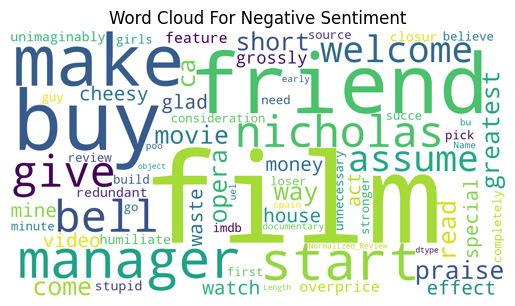

In [18]:
word_cloud_('Negative')

**2-Positive**

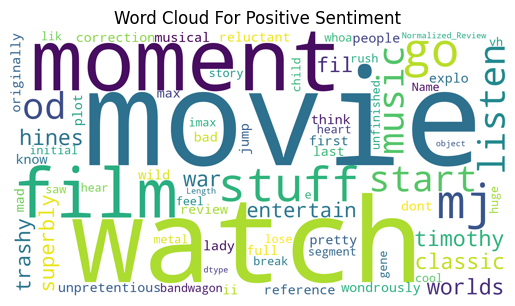

In [19]:
word_cloud_('Positive')

# Most Frequent Words 

In [20]:
MostFrequentWord = Counter((Corpus['Normalized_Review']).str.split().explode()).most_common(15)
MostFrequentWordDF = pd.DataFrame(MostFrequentWord, columns=('Word', 'Count'))
MostFrequentWordDF

,Word,Count
0,film,48211
1,movie,44047
2,like,22372
3,see,20814
4,time,16177
5,make,15551
6,character,14183
7,watch,13940
8,think,12352
9,story,11990


In [21]:
fig = go.Figure(go.Funnel(
    y = MostFrequentWordDF['Word'].tolist(),
    x = MostFrequentWordDF['Count'].tolist(),
    marker = {"color": color3}))
fig.show()

In [22]:
fig = px.bar(MostFrequentWordDF, y='Word', x='Count',  orientation='h')
fig.show()

# Number Of Words 

In [23]:
Corpus["Number of Words"] = Corpus["Normalized_Review"].apply(lambda n:len(word_tokenize(n)))
Corpus.drop(Corpus[ Corpus["Number of Words"] == 0].index, inplace = True)
Corpus["Number of Words"].sum()

2595981

# Number Of Charachters 

In [24]:
Corpus["Number of Charachters"] = Corpus["Normalized_Review"].str.len()
Corpus["Number of Charachters"].sum()

17369402

# Average Number Of Words 

In [25]:
AverageNaumberOfWords = int(np.round((Corpus["Number of Words"].mean())))
AverageNaumberOfWords

104

# Average Number Of Charachters 

In [26]:
AverageNumberOfCharachters = int(np.round(Corpus["Number of Charachters"].mean()))
AverageNumberOfCharachters

695

# Maximum Number Of Word

In [27]:
MaximumNaumberOfWords = Corpus["Number of Words"].max()
MaximumNaumberOfWords

1275

# Maximum Number Of Charachters 

In [28]:
MaximumNumberOfCharachters = Corpus['Number of Charachters'].max() 
MaximumNumberOfCharachters

7937

# Minimum Number Of Words

In [29]:
MimimumNaumberOfWords = Corpus["Number of Words"].min()
MimimumNaumberOfWords

3

# Minimum Number Of Charachters 

In [30]:
MinimumNumberOfCharachters = Corpus['Number of Charachters'].min() 
MinimumNumberOfCharachters

21

# Split The DataSet Into Independent Variables (X) And Dependent Variable (Y)

In [31]:
X= Corpus['Normalized_Review']
y = Corpus['Sentiment']

# Label Encoder

In [32]:
y = LabelEncoder().fit_transform(y)

# Split The Dataset Into Training And Testing

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=44)

# TfidfVectorizer

In [34]:
Tfid = TfidfVectorizer()
X_train_Tfid = Tfid.fit_transform(X_train)
X_test_Tfid = Tfid.transform(X_test)

In [35]:
vocab = Tfid.vocabulary_
vocab

{'movie': 33813,
 'write': 56498,
 'direct': 13536,
 'produce': 39822,
 'intention': 25472,
 'create': 11114,
 'bad': 3531,
 'cult': 11525,
 'classic': 9091,
 'say': 44155,
 'hit': 23153,
 'watch': 55303,
 'absolutely': 174,
 'awful': 3345,
 'fascinate': 17471,
 'term': 50405,
 'fault': 17541,
 'well': 55543,
 'act': 392,
 'cast': 7730,
 'nominate': 35242,
 'worst': 56413,
 'performance': 37840,
 'award': 3331,
 'hard': 22111,
 'find': 18041,
 'film': 17969,
 'kind': 27596,
 'production': 39827,
 'budget': 6608,
 'contain': 10370,
 'little': 29593,
 'value': 54096,
 'whole': 55794,
 'open': 36173,
 'scenes': 44279,
 'defy': 12503,
 'logic': 29750,
 'dialogue': 13241,
 'completely': 9896,
 'unbelievable': 52742,
 'illogical': 24358,
 'ditto': 13955,
 'behaviour': 4400,
 'general': 19894,
 'storyline': 48373,
 'mind': 32749,
 'boggle': 5558,
 'buffoons': 6629,
 'boardroom': 5469,
 'actually': 432,
 'make': 30725,
 'decisions': 12312,
 'spend': 47469,
 'money': 33334,
 'piece': 38364,
 't

# Models

In [36]:
def models_(model_name):
    model = model_name
    model.fit(X_train_Tfid, y_train)
    y_pred = model.predict(X_test_Tfid)
    return y_pred

# Confusion Matrix

In [37]:
def confusion_matrix_(Real, Prediction):
        ConfusionMatrix = confusion_matrix(Real, Prediction)
        return ConfusionMatrix

# Generate True Positive, False Positive, True Negative, False Negative

In [38]:
def positive_negative(Confusin_Matrix):
    False_Postive = Confusin_Matrix[0, 1]

    True_Positive = Confusin_Matrix[0, 0]

    False_Negative = Confusin_Matrix[1, 0]
    
    True_Negative = Confusin_Matrix[1, 1]

    return False_Postive, True_Positive, False_Negative, True_Negative

# Performance Merics

In [39]:
def performance_metrics(False_Postive, True_Positive, False_Negative, True_Negative):
     Accuracy = (True_Positive + True_Negative) / (True_Positive + True_Negative + False_Postive + False_Negative)
     Precision = True_Positive / (True_Positive+ False_Postive)
     Sensitivity = True_Positive / (True_Positive  + False_Negative)
     Specificity = True_Negative / (True_Negative + False_Negative)
     F1Score = (True_Positive) / ((True_Positive) + (0.5 *(False_Postive + False_Negative)))
     Error = 1 - Accuracy
     MetricsValues = pd.DataFrame(index=['Accuracy', 'Precision', 'Sensitivity', 'Specificity', 'F1Score', 'Error'], columns=['Values'], data=[Accuracy, Precision, Sensitivity, Specificity, F1Score, Error])
     return MetricsValues


# Machine Learning

**1. Naive Bayes**

In [40]:
model_name1 = MultinomialNB()
y_pred1 = models_(model_name1)

In [41]:
cm1 = confusion_matrix_(y_test, y_pred1)

In [42]:
False_Postive, True_Positive, False_Negative, True_Negative = positive_negative(cm1)

In [43]:
MetricsValues1 = performance_metrics(False_Postive, True_Positive, False_Negative, True_Negative)

In [44]:
MetricsValues1

,Values
Accuracy,0.861867
Precision,0.873990
Sensitivity,0.851075
Specificity,0.849974
F1Score,0.862380
Error,0.138133


**2. Logistic Regression**

In [45]:
model_name2 = LogisticRegression()
y_pred2 = models_(model_name2)

In [46]:
cm2 = confusion_matrix_(y_test, y_pred2)

In [47]:
False_Postive2, True_Positive2, False_Negative2, True_Negative2 = positive_negative(cm2)
MetricsValues2 = performance_metrics(False_Postive2, True_Positive2, False_Negative2, True_Negative2)
MetricsValues2

,Values
Accuracy,0.885067
Precision,0.864836
Sensitivity,0.899216
Specificity,0.904913
F1Score,0.881691
Error,0.114933


**3. Decision Tree**

In [48]:
model_name3 = DecisionTreeClassifier(criterion = 'entropy')
y_pred3 = models_(model_name3)

In [49]:
cm3 = confusion_matrix_(y_test, y_pred3)

In [50]:
False_Postive3, True_Positive3, False_Negative3, True_Negative3 = positive_negative(cm3)
MetricsValues3 = performance_metrics(False_Postive3, True_Positive3, False_Negative3, True_Negative3)
MetricsValues3

,Values
Accuracy,0.707733
Precision,0.710824
Sensitivity,0.702501
Specificity,0.704702
F1Score,0.706638
Error,0.292267


**4. K Nearest Neighbor**

In [51]:
model_name4 = KNeighborsClassifier(metric='cosine', n_neighbors=5)
y_pred4 = models_(model_name4)

In [52]:
cm4 = confusion_matrix_(y_test, y_pred4)

In [53]:
False_Postive4, True_Positive4, False_Negative4, True_Negative4 = positive_negative(cm4)
MetricsValues4 = performance_metrics(False_Postive4, True_Positive4, False_Negative4, True_Negative4)
MetricsValues4

,Values
Accuracy,0.791467
Precision,0.735057
Sensitivity,0.824773
Specificity,0.846804
F1Score,0.777335
Error,0.208533


**5. Random Forest**

In [54]:
model_name5 = RandomForestClassifier(criterion = 'entropy', n_estimators=100)
y_pred5 = models_(model_name5)

In [55]:
cm5 = confusion_matrix_(y_test, y_pred5)

In [56]:
False_Postive5, True_Positive5, False_Negative5, True_Negative5 = positive_negative(cm5)
MetricsValues5 = performance_metrics(False_Postive5, True_Positive5, False_Negative5, True_Negative5)
MetricsValues5

,Values
Accuracy,0.852533
Precision,0.845988
Sensitivity,0.854733
Specificity,0.858954
F1Score,0.850338
Error,0.147467


**6.SGD Classifier**

In [57]:
model_name6 = SGDClassifier(loss='hinge')
y_pred6 = models_(model_name6)

In [58]:
cm6 = confusion_matrix_(y_test, y_pred6)

In [59]:
False_Postive6, True_Positive6, False_Negative6, True_Negative6 = positive_negative(cm6)
MetricsValues6 = performance_metrics(False_Postive6, True_Positive6, False_Negative6, True_Negative6)
MetricsValues6

,Values
Accuracy,0.889600
Precision,0.869682
Sensitivity,0.903749
Specificity,0.909139
F1Score,0.886389
Error,0.110400


# Deep Learning

In [60]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
embedding_dim = 16
vocab_size = len(tokenizer.word_index) + 1

In [61]:
vocab_size

57333

In [62]:
X_train_seqs = tokenizer.texts_to_sequences(X_train)
X_test_seqs = tokenizer.texts_to_sequences(X_test)
max_length = len(max(X_train_seqs, key=len))

In [63]:
max_length

830

In [64]:
encoded_X_train = sequence.pad_sequences(X_train_seqs, maxlen=max_length)
encoded_X_test = sequence.pad_sequences(X_test_seqs, maxlen=max_length)

In [65]:
Callback = tf.keras.callbacks.EarlyStopping(
                    monitor="accuracy",
                    mode="max",
                    start_from_epoch=5
                )

**7-Convolutional Neural Network**

In [66]:
model = tf.keras.Sequential([
                Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
                Conv1D(filters=32, kernel_size = 3, activation='relu'),
                GlobalAveragePooling1D(),
                Dropout(0.2),
                Dense(1, activation= 'sigmoid')
                ])

In [67]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [68]:
history = model.fit(encoded_X_train, y_train,
                    epochs=50,
                    validation_data=(encoded_X_test, y_test),
                    batch_size=16,
                    callbacks=[Callback])

Epoch 1/50
1329/1329 [==============================] - 73s 55ms/step - loss: 0.5336 - accuracy: 0.7560 - val_loss: 0.3488 - val_accuracy: 0.8749
Epoch 2/50
1329/1329 [==============================] - 22s 16ms/step - loss: 0.2721 - accuracy: 0.9020 - val_loss: 0.2946 - val_accuracy: 0.8915
Epoch 3/50
1329/1329 [==============================] - 22s 17ms/step - loss: 0.1972 - accuracy: 0.9309 - val_loss: 0.2909 - val_accuracy: 0.8893
Epoch 4/50
1329/1329 [==============================] - 21s 16ms/step - loss: 0.1465 - accuracy: 0.9503 - val_loss: 0.2968 - val_accuracy: 0.8901
Epoch 5/50
1329/1329 [==============================] - 21s 16ms/step - loss: 0.1111 - accuracy: 0.9642 - val_loss: 0.3207 - val_accuracy: 0.8853
Epoch 6/50
1329/1329 [==============================] - 21s 16ms/step - loss: 0.0854 - accuracy: 0.9736 - val_loss: 0.3333 - val_accuracy: 0.8899
Epoch 7/50
1329/1329 [==============================] - 20s 15ms/step - loss: 0.0637 - accuracy: 0.9815 - val_loss: 0.3814 -

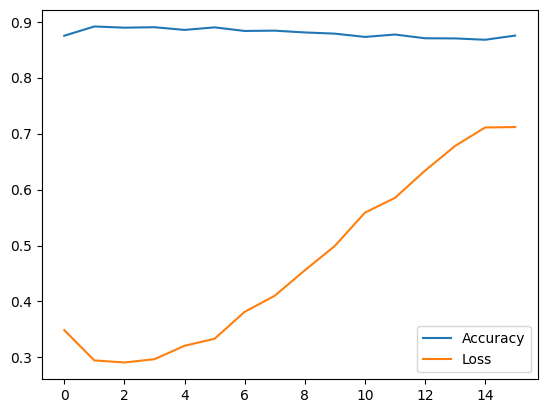

In [69]:
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

plt.plot(val_acc, label='Accuracy')
plt.plot(val_loss, label='Loss')
plt.legend()
plt.show()

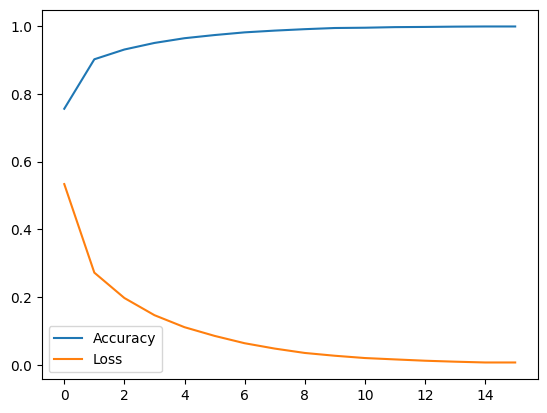

In [70]:
acc = history.history['accuracy']
loss = history.history['loss']

plt.plot(acc, label='Accuracy')
plt.plot(loss, label='Loss')
plt.legend()
plt.show()

In [71]:
loss, accuracy = model.evaluate(encoded_X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(encoded_X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9995
Testing Accuracy:  0.8752


**8-Recurrent Neural Networks**

In [72]:
model = tf.keras.Sequential([
        Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
        LSTM(32, return_sequences=False),  
        Dropout(0.2),      
        Dense(1, activation='sigmoid')])

In [73]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [74]:
history = model.fit(encoded_X_train, y_train,
                    epochs=50,
                    validation_data=(encoded_X_test, y_test),
                    batch_size=16,
                    callbacks=[Callback])

Epoch 1/50
1329/1329 [==============================] - 114s 84ms/step - loss: 0.3795 - accuracy: 0.8264 - val_loss: 0.2996 - val_accuracy: 0.8811
Epoch 2/50
1329/1329 [==============================] - 98s 74ms/step - loss: 0.1761 - accuracy: 0.9367 - val_loss: 0.3222 - val_accuracy: 0.8837
Epoch 3/50
1329/1329 [==============================] - 96s 72ms/step - loss: 0.1007 - accuracy: 0.9656 - val_loss: 0.4013 - val_accuracy: 0.8755
Epoch 4/50
1329/1329 [==============================] - 93s 70ms/step - loss: 0.0698 - accuracy: 0.9770 - val_loss: 0.4320 - val_accuracy: 0.8659
Epoch 5/50
1329/1329 [==============================] - 92s 69ms/step - loss: 0.0477 - accuracy: 0.9848 - val_loss: 0.4644 - val_accuracy: 0.8677
Epoch 6/50
1329/1329 [==============================] - 93s 70ms/step - loss: 0.0258 - accuracy: 0.9924 - val_loss: 0.6463 - val_accuracy: 0.8589
Epoch 7/50
1329/1329 [==============================] - 91s 68ms/step - loss: 0.0245 - accuracy: 0.9931 - val_loss: 0.5755 

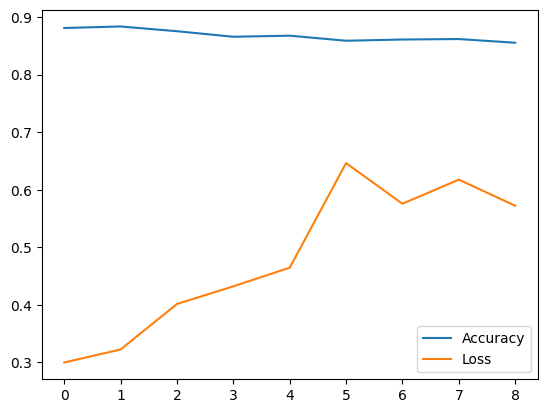

In [75]:
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

plt.plot(val_acc, label='Accuracy')
plt.plot(val_loss, label='Loss')
plt.legend()
plt.show()

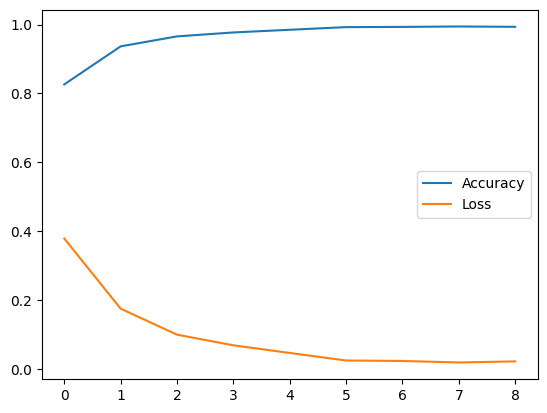

In [76]:
acc = history.history['accuracy']
loss = history.history['loss']

plt.plot(acc, label='Accuracy')
plt.plot(loss, label='Loss')
plt.legend()
plt.show()

In [77]:
loss, accuracy = model.evaluate(encoded_X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(encoded_X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9952
Testing Accuracy:  0.8555
